In [1]:
pip install graphviz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_renomear = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_trocar = { 
    'no': 0,
    'yes':1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime 

ano_atual = datetime.today().year 
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [6]:
dados['km_por_ano'] = dados.milhas_por_ano/0.62137

In [7]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.375863
1,1,7843,1998,40557.96,1,26,12622.109210
2,2,7109,2006,89627.50,0,18,11440.848448
3,3,26823,2015,95276.14,0,9,43167.516938
4,4,7935,2014,117384.68,1,10,12770.169142


In [8]:
dados = dados.drop(columns=['Unnamed: 0','milhas_por_ano','ano_do_modelo'],axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.375863
1,40557.96,1,26,12622.109210
2,89627.50,0,18,11440.848448
3,95276.14,0,9,43167.516938
4,117384.68,1,10,12770.169142


In [9]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

seed = 5
np.random.seed(seed)

treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,test_size=0.25,stratify=y)#mantém a proporcionalidade de acordo com y 
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x) 

acuracia = accuracy_score(teste_y,previsoes)*100
print("A acurácia foi de %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 46.88%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()#estrategia padrão: stratified
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x,teste_y) * 100

#acuracia = accuracy_score(teste_y,previsoes)*100
print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)


A acurácia do dummy stratified foi de 58.00%


In [12]:
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = dummy_most_frequent.score(teste_x,teste_y) * 100

#acuracia = accuracy_score(teste_y,previsoes)*100
print("A acurácia do dummy most frequent foi de %.2f%%" % acuracia)

A acurácia do dummy most frequent foi de 58.00%


In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x) 

acuracia = accuracy_score(teste_y,previsoes)*100
print("A acurácia com StandardScaler e SVC foi de %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia com StandardScaler e SVC foi de 76.72%


In [54]:
from sklearn.tree import DecisionTreeClassifier

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#Decisiom tree não precisa de scaler
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x) 

acuracia = accuracy_score(teste_y,previsoes)*100
print("A acurácia com decision tree classifier foi de %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia com decision tree classifier foi de 78.28%


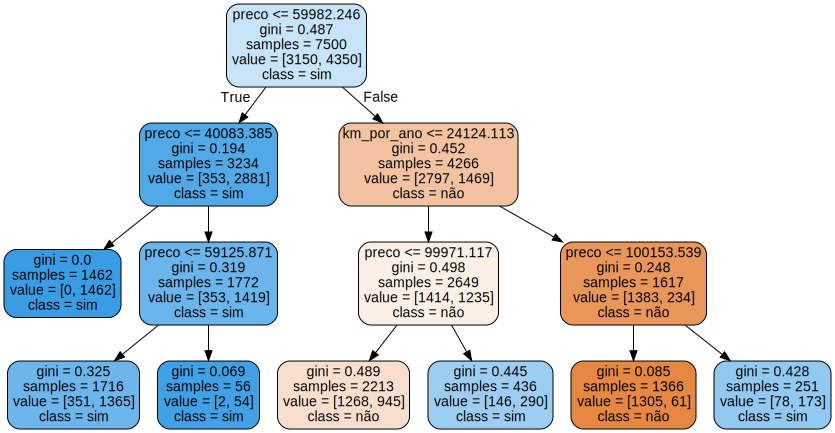

In [56]:
from sklearn.tree import export_graphviz 
import graphviz

features = x.columns

dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                          feature_names=features, 
                          class_names=['não','sim'])
grafico = graphviz.Source(dot_data) 
grafico